In [99]:
import pandas as pd
import psycopg2
import random
import numpy as np

In [100]:
# Ingest the dataset 
credit = pd.read_csv('creditcard.csv')

In [101]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [102]:
# Checking for number of rows and columns
credit.shape

(284807, 31)

In [103]:
# Checking for the datatypes of the dataset
credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [104]:
# Checking for missing values
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [105]:
# Checking for the number of duplicate values in the dataset
credit.duplicated().sum()

np.int64(1081)

In [106]:
# Checking for duplicates and columns affected
duplicated = credit[credit.duplicated()]
duplicated

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [107]:
# Checking for unqiue values in our dataset
credit.nunique().sum()

np.int64(7875925)

In [108]:
# Dropping the duplicates because it doesn't cause any bais in our analysis
credit = credit.drop_duplicates()

In [109]:
# Checking for duplicates after dropping no duplicates
credit.duplicated().sum()

np.int64(0)

In [111]:
# Coverting the class datatype from float to boolean
# In class those with False are normal transaction and True are Fraud transaction
credit['Class'] = credit['Class'].astype(bool)
print(credit['Class'].dtype)

bool


In [112]:
# Converting the Time datatype from float (seconds) to HH:MM:SS format
credit['Time'] = pd.to_datetime(credit['Time'], unit = 's')
print(credit['Time'].head())

0   1970-01-01 00:00:00
1   1970-01-01 00:00:00
2   1970-01-01 00:00:01
3   1970-01-01 00:00:01
4   1970-01-01 00:00:02
Name: Time, dtype: datetime64[ns]


In [113]:
# Renaming columns name from V1...V28 to Spending_Patterns
credit = credit.rename(columns={'V1': 'Spending_Pattern1', 'V2': 'Spending_Pattern2',
                                  'V3': 'Spending_Pattern3', 'V4': 'Spending_Pattern4',
                                  'V5': 'Spending_Pattern5', 'V6': 'Spending_Pattern6',
                                  'V7': 'Spending_Pattern7', 'V8': 'Spending_Pattern8',
                                  'V9': 'Spending_Pattern9', 'V10': 'Spending_Pattern10',
                                  'V11': 'Spending_Pattern11', 'V12': 'Spending_Pattern12',
                                  'V13': 'Spending_Pattern13', 'V14': 'Spending_Pattern14',
                                  'V15': 'Spending_Pattern15', 'V16': 'Spending_Pattern16',
                                  'V17': 'Spending_Pattern17', 'V18': 'Spending_Pattern18',
                                  'V19': 'Spending_Pattern19', 'V20': 'Spending_Pattern20',
                                  'V21': 'Spending_Pattern21', 'V22': 'Spending_Pattern22',
                                  'V23': 'Spending_Pattern23', 'V24': 'Spending_Pattern24',
                                  'V25': 'Spending_Pattern25', 'V26': 'Spending_Pattern26',
                                  'V27': 'Spending_Pattern27', 'V28': 'Spending_Pattern28'})
print(credit.columns)

Index(['Time', 'Spending_Pattern1', 'Spending_Pattern2', 'Spending_Pattern3',
       'Spending_Pattern4', 'Spending_Pattern5', 'Spending_Pattern6',
       'Spending_Pattern7', 'Spending_Pattern8', 'Spending_Pattern9',
       'Spending_Pattern10', 'Spending_Pattern11', 'Spending_Pattern12',
       'Spending_Pattern13', 'Spending_Pattern14', 'Spending_Pattern15',
       'Spending_Pattern16', 'Spending_Pattern17', 'Spending_Pattern18',
       'Spending_Pattern19', 'Spending_Pattern20', 'Spending_Pattern21',
       'Spending_Pattern22', 'Spending_Pattern23', 'Spending_Pattern24',
       'Spending_Pattern25', 'Spending_Pattern26', 'Spending_Pattern27',
       'Spending_Pattern28', 'Amount', 'Class'],
      dtype='object')


In [114]:
credit.shape

(283726, 31)

In [116]:
# Calculate Z-scores for transaction amounts
credit['Z_score'] = (credit['Amount'] - credit['Amount'].mean()) / credit['Amount'].std()

# Flag anomalies (3 std dev rule)
credit['Amount_anomaly'] = np.where(abs(credit['Z_score']) > 3, 1, 0)

# Check anomaly counts
print(credit['Amount_anomaly'].value_counts())


Amount_anomaly
0    279663
1      4063
Name: count, dtype: int64


In [119]:
# Adding transaction_id (1 → N)
credit['Transaction_id'] = range(1, len(credit) + 1)

In [120]:
credit.head()

,Time,Spending_Pattern1,Spending_Pattern2,Spending_Pattern3,Spending_Pattern4,Spending_Pattern5,Spending_Pattern6,Spending_Pattern7,Spending_Pattern8,Spending_Pattern9,...,Spending_Pattern24,Spending_Pattern25,Spending_Pattern26,Spending_Pattern27,Spending_Pattern28,Amount,Class,Z_score,Amount_anomaly,Transaction_id
0,1970-01-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False,0.244199,0,1
1,1970-01-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False,-0.342583,0,2
2,1970-01-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False,1.158898,0,3
3,1970-01-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False,0.139886,0,4
4,1970-01-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False,-0.073813,0,5


In [121]:
merchant = pd.read_csv("merchants.csv")

In [122]:
merchant.head()

,id,merchant_name,merchant_location
0,1,"Nile Delta Bank Cairo, Egypt","Cairo, Egypt"
1,2,"BlueRiver Financial Group London, United Kingdom","London, United Kingdom"
2,3,"Ubuntu Commercial Bank Johannesburg, South Africa","Johannesburg, South Africa"
3,4,"Ubuntu Commercial Bank Johannesburg, South Africa","Johannesburg, South Africa"
4,5,"GoldCoast Heritage Bank Accra, Ghana","Accra, Ghana"


In [123]:
# Randomly assigning merchant_id to each transactions
credit['Merchant_id'] = np.random.choice(merchant['id'], size=len(credit))

In [125]:
credit.shape

(283726, 35)

In [126]:
print(credit.columns)

Index(['Time', 'Spending_Pattern1', 'Spending_Pattern2', 'Spending_Pattern3',
       'Spending_Pattern4', 'Spending_Pattern5', 'Spending_Pattern6',
       'Spending_Pattern7', 'Spending_Pattern8', 'Spending_Pattern9',
       'Spending_Pattern10', 'Spending_Pattern11', 'Spending_Pattern12',
       'Spending_Pattern13', 'Spending_Pattern14', 'Spending_Pattern15',
       'Spending_Pattern16', 'Spending_Pattern17', 'Spending_Pattern18',
       'Spending_Pattern19', 'Spending_Pattern20', 'Spending_Pattern21',
       'Spending_Pattern22', 'Spending_Pattern23', 'Spending_Pattern24',
       'Spending_Pattern25', 'Spending_Pattern26', 'Spending_Pattern27',
       'Spending_Pattern28', 'Amount', 'Class', 'Z_score', 'Amount_anomaly',
       'Transaction_id', 'Merchant_id'],
      dtype='object')


In [127]:
credit.dtypes

Time                  datetime64[ns]
Spending_Pattern1            float64
Spending_Pattern2            float64
Spending_Pattern3            float64
Spending_Pattern4            float64
Spending_Pattern5            float64
Spending_Pattern6            float64
Spending_Pattern7            float64
Spending_Pattern8            float64
Spending_Pattern9            float64
Spending_Pattern10           float64
Spending_Pattern11           float64
Spending_Pattern12           float64
Spending_Pattern13           float64
Spending_Pattern14           float64
Spending_Pattern15           float64
Spending_Pattern16           float64
Spending_Pattern17           float64
Spending_Pattern18           float64
Spending_Pattern19           float64
Spending_Pattern20           float64
Spending_Pattern21           float64
Spending_Pattern22           float64
Spending_Pattern23           float64
Spending_Pattern24           float64
Spending_Pattern25           float64
Spending_Pattern26           float64
S

In [135]:
credit.shape

(283726, 35)

In [6]:
!pip install matplotlib

  Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.1-cp313-cp313-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
import matplotlib.pyplot as plt

In [129]:
LABELS = ["Normal", "Fraud"]

Text(0, 0.5, 'Frequency')

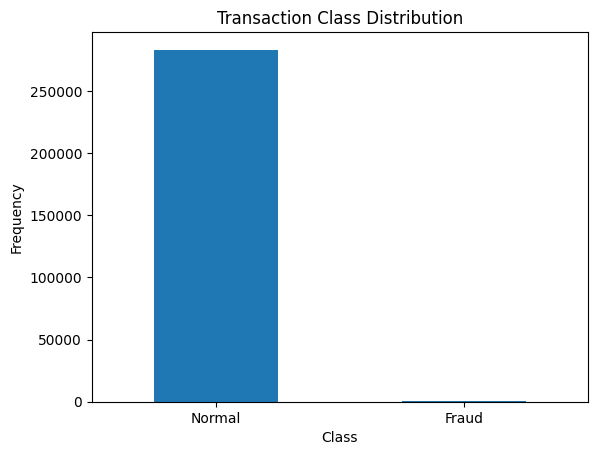

In [130]:
count_classes = pd.Series.value_counts(credit['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [131]:
## Get the Fraud and the normal dataset 

fraud = credit[credit['Class']==1]

normal = credit[credit['Class']==0]

In [132]:
fraud.shape, normal.shape

((473, 35), (283253, 35))

### Loading my cleaned dataset to postgresSQL

In [136]:
def extract():
    credit = pd.read_csv("creditcard.csv")
    return credit

def extract_m():
    merchant = pd.read_csv("merchants.csv")
    return merchant

def transform(credit):
    # Renaming columns name from V1...V28 to Spending_Patterns
    credit = credit.rename(columns={'V1': 'Spending_Pattern1', 'V2': 'Spending_Pattern2',
                                  'V3': 'Spending_Pattern3', 'V4': 'Spending_Pattern4',
                                  'V5': 'Spending_Pattern5', 'V6': 'Spending_Pattern6',
                                  'V7': 'Spending_Pattern7', 'V8': 'Spending_Pattern8',
                                  'V9': 'Spending_Pattern9', 'V10': 'Spending_Pattern10',
                                  'V11': 'Spending_Pattern11', 'V12': 'Spending_Pattern12',
                                  'V13': 'Spending_Pattern13', 'V14': 'Spending_Pattern14',
                                  'V15': 'Spending_Pattern15', 'V16': 'Spending_Pattern16',
                                  'V17': 'Spending_Pattern17', 'V18': 'Spending_Pattern18',
                                  'V19': 'Spending_Pattern19', 'V20': 'Spending_Pattern20',
                                  'V21': 'Spending_Pattern21', 'V22': 'Spending_Pattern22',
                                  'V23': 'Spending_Pattern23', 'V24': 'Spending_Pattern24',
                                  'V25': 'Spending_Pattern25', 'V26': 'Spending_Pattern26',
                                  'V27': 'Spending_Pattern27', 'V28': 'Spending_Pattern28'})
    # Dropping the duplicates because it doesn't cause any bais in our analysis
    credit = credit.drop_duplicates()
    # Coverting the class datatype from float to boolean
    # In class those with False are normal transaction and True are Fraud transaction
    credit['Class'] = credit['Class'].astype(bool)
    # Converting the Time datatype from float (seconds) to HH:MM:SS format
    credit['Time'] = pd.to_datetime(credit['Time'], unit = 's')
    # Calculate Z-scores for transaction amounts
    credit['z_score'] = (credit['Amount'] - credit['Amount'].mean()) / credit['Amount'].std()
    # Flag anomalies (3 std dev rule)
    credit['amount_anomaly'] = np.where(abs(credit['z_score']) > 3, 1, 0)
    # Adding transaction_id (1 → N)
    credit['transaction_id'] = range(1, len(credit) + 1)
    # Randomly assigning merchant_id to each transactions
    merchant = extract_m()
    credit['merchant_id'] = np.random.choice(merchant['id'], size=len(credit))
    return credit

def load(credit):
    try:
        connection = psycopg2.connect(
                host = "localhost",
                dbname = "Fraud_Alert",
                user = "postgres",
                password = "BBK#0027"
        )

        con = connection.cursor()

        for _, row in credit.iterrows():
            con.execute("""
                        INSERT INTO creditcard(Time, Spending_Pattern1, Spending_Pattern2, Spending_Pattern3,
                        Spending_Pattern4, Spending_Pattern5, Spending_Pattern6, Spending_Pattern7, 
                        Spending_Pattern8, Spending_Pattern9, Spending_Pattern10, Spending_Pattern11, 
                        Spending_Pattern12, Spending_Pattern13, Spending_Pattern14, Spending_Pattern15,
                        Spending_Pattern16, Spending_Pattern17, Spending_Pattern18, Spending_Pattern19, 
                        Spending_Pattern20, Spending_Pattern21, Spending_Pattern22, Spending_Pattern23, 
                        Spending_Pattern24, Spending_Pattern25, Spending_Pattern26, Spending_Pattern27,
                        Spending_Pattern28, Amount, Class, Z_score, Amount_anomaly, Transaction_id, Merchant_id)
                        VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,
                        %s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s) """, tuple (row)
                        )
            
        connection.commit()
        con.close()
        connection.close()
        print("Data loaded successfully into creditcard table.")

    except Exception as e:
        print("Error", e)

if __name__ == "__main__":
    raw_data = extract()
    clean_data = transform(raw_data)
    load(clean_data)

Data loaded successfully into creditcard table.
